In [161]:
### Stock Market Prediction And Forecasting Using Stacked LSTM

In [162]:
import pandas as pd

In [163]:
from pandas_datareader import data as pdr
import datetime as dt

import yfinance as yf
import tensorflow
yf.pdr_override() # i dont know what is it doing
#Load Data
company = 'AAPL'
data_source = 'yahoo'
end  = dt.datetime.now()
start = end - dt.timedelta(days = (365*5)+1)
# start  = dt.datetime(2015,1,1)
# end = dt.datetime(2020,1,1)
df = pdr.get_data_yahoo(company, start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [164]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-25,51.707500,51.939999,51.279999,51.320000,49.405704,74172800
2019-04-26,51.224998,51.250000,50.529999,51.075001,49.169849,74596400
2019-04-29,51.099998,51.492500,50.965000,51.152500,49.244450,88818800
2019-04-30,50.764999,50.849998,49.777500,50.167500,48.296185,186139600
2019-05-01,52.470001,53.827499,52.307499,52.630001,50.666843,259309200


In [165]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900
2024-04-19,166.210007,166.399994,164.080002,165.000000,165.000000,67772100
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400
2024-04-23,165.259995,167.050003,164.929993,166.899994,166.899994,48868033


In [166]:
df1=df.reset_index()['High']

In [167]:
df1

0        51.939999
1        51.250000
2        51.492500
3        50.849998
4        53.827499
           ...    
1253    170.649994
1254    168.639999
1255    166.399994
1256    167.259995
1257    167.050003
Name: High, Length: 1258, dtype: float64

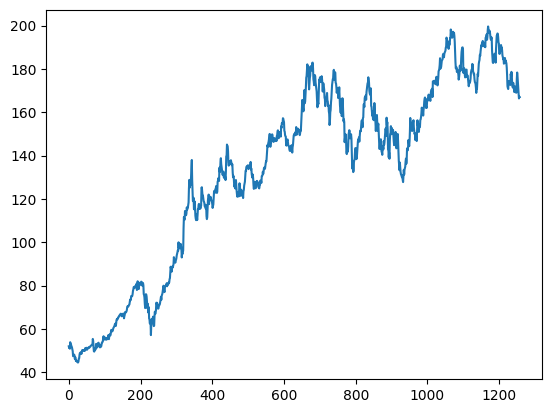

In [168]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [169]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [170]:
import numpy as np

In [171]:
df1

0        51.939999
1        51.250000
2        51.492500
3        50.849998
4        53.827499
           ...    
1253    170.649994
1254    168.639999
1255    166.399994
1256    167.259995
1257    167.050003
Name: High, Length: 1258, dtype: float64

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [173]:
df1

array([[0.0480856 ],
       [0.04363801],
       [0.04520111],
       ...,
       [0.78587081],
       [0.7914142 ],
       [0.79006064]])

In [174]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [175]:
training_size,test_size

(817, 441)

In [176]:
train_data

array([[4.80855956e-02],
       [4.36380086e-02],
       [4.52011149e-02],
       [4.10596823e-02],
       [6.02520312e-02],
       [5.59655742e-02],
       [5.46603054e-02],
       [4.98259621e-02],
       [4.75377092e-02],
       [4.41858949e-02],
       [3.82879902e-02],
       [3.37276146e-02],
       [1.86283323e-02],
       [1.89828528e-02],
       [2.22863256e-02],
       [2.34465700e-02],
       [2.09165852e-02],
       [1.03616220e-02],
       [1.62433965e-02],
       [1.25531919e-02],
       [4.22198529e-03],
       [6.80031156e-03],
       [4.30256260e-03],
       [2.30438310e-03],
       [2.11099265e-03],
       [1.12813147e-04],
       [0.00000000e+00],
       [3.07787114e-03],
       [1.13929475e-02],
       [1.21664356e-02],
       [2.25602688e-02],
       [2.81197587e-02],
       [2.91349786e-02],
       [2.90866372e-02],
       [3.04080116e-02],
       [2.52513836e-02],
       [2.74590838e-02],
       [3.60480788e-02],
       [3.53874039e-02],
       [3.65637538e-02],


In [177]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [178]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [179]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [180]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [181]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [182]:
X_train

array([[[0.0480856 ],
        [0.04363801],
        [0.04520111],
        ...,
        [0.07815522],
        [0.06908276],
        [0.06801922]],

       [[0.04363801],
        [0.04520111],
        [0.04105968],
        ...,
        [0.06908276],
        [0.06801922],
        [0.06913112]],

       [[0.04520111],
        [0.04105968],
        [0.06025203],
        ...,
        [0.06801922],
        [0.06913112],
        [0.07240236]],

       ...,

       [[0.78774015],
        [0.78425936],
        [0.76298833],
        ...,
        [0.6572773 ],
        [0.67339178],
        [0.68570326]],

       [[0.78425936],
        [0.76298833],
        [0.77762021],
        ...,
        [0.67339178],
        [0.68570326],
        [0.69027982]],

       [[0.76298833],
        [0.77762021],
        [0.77955396],
        ...,
        [0.68570326],
        [0.69027982],
        [0.68808817]]])

In [183]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [184]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


c:\Users\Yuvraj Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [185]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [186]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [187]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.1660 - val_loss: 0.0369
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0147 - val_loss: 0.0027
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0062 - val_loss: 0.0099
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0026 - val_loss: 0.0065
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - los

In [188]:
import tensorflow as tf

In [189]:
tf.__version__

'2.16.1'

In [190]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [191]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [192]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

127.29107002323191

In [193]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

174.1019891117188

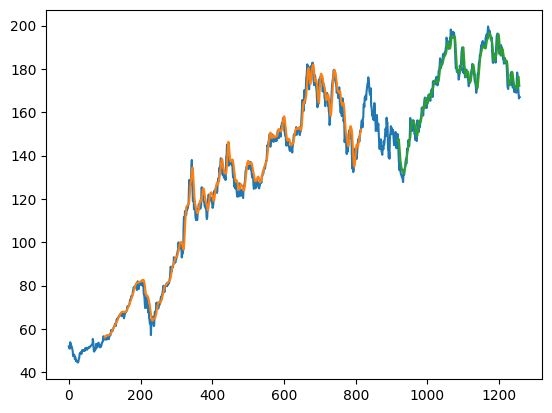

In [194]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [195]:
len(test_data)

441

In [196]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [197]:
x_input

array([[0.9514632 , 0.94005422, 0.94804694, 0.93831383, 0.96635296,
        0.96867345, 0.97022048, 0.97660185, 0.96048737, 0.96841566,
        0.98955785, 1.        , 0.99213613, 0.98072715, 0.98278975,
        0.98749515, 0.98362773, 0.97286327, 0.96306564, 0.96055179,
        0.96802893, 0.96635296, 0.9279361 , 0.91143489, 0.89345108,
        0.89132396, 0.90963008, 0.9067294 , 0.91478663, 0.91897646,
        0.91697828, 0.90099265, 0.89241973, 0.93244814, 0.95056079,
        0.9723476 , 0.97505482, 0.9791157 , 0.97840666, 0.96867345,
        0.95217224, 0.94959396, 0.91929877, 0.91833184, 0.92078127,
        0.93315718, 0.93354391, 0.94475962, 0.93502641, 0.9379271 ,
        0.92941861, 0.91356202, 0.90917883, 0.90247525, 0.90479574,
        0.88919684, 0.89216194, 0.90550478, 0.90602035, 0.89132396,
        0.8988011 , 0.89364445, 0.89009934, 0.87694987, 0.85355162,
        0.82222507, 0.81706852, 0.8137811 , 0.83292511, 0.8373083 ,
        0.83505223, 0.82963779, 0.83685704, 0.82

In [198]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [199]:
temp_input

[0.9514632010179543,
 0.9400542216176889,
 0.9480469396126817,
 0.9383138304860513,
 0.9663529626814947,
 0.968673451405356,
 0.9702204766729191,
 0.9766018452522792,
 0.9604873675462887,
 0.9684156630382453,
 0.9895578499201075,
 1.0,
 0.9921361270110794,
 0.980727147610814,
 0.9827897496125982,
 0.9874951495633569,
 0.983627733926899,
 0.9728632746218934,
 0.9630656446372606,
 0.9605517900493249,
 0.9680289313100964,
 0.9663529626814947,
 0.9279361029091949,
 0.9114348934750552,
 0.8934510812763888,
 0.8913239584166021,
 0.9096300798403817,
 0.9067293951693304,
 0.9147866340223255,
 0.9189764572388629,
 0.9169782777401146,
 0.9009926450401963,
 0.8924197310980134,
 0.9324481369958789,
 0.9505607942006175,
 0.9723475995327057,
 0.9750548199847161,
 0.979115699840215,
 0.9784066588869528,
 0.968673451405356,
 0.9521722419712165,
 0.9495939648802446,
 0.9192987664639759,
 0.9183318387886367,
 0.9207812708735365,
 0.9331571779491411,
 0.9335439096772903,
 0.9447596215684476,
 0.935026414

In [200]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.79821587]
101
1 day input [0.94005422 0.94804694 0.93831383 0.96635296 0.96867345 0.97022048
 0.97660185 0.96048737 0.96841566 0.98955785 1.         0.99213613
 0.98072715 0.98278975 0.98749515 0.98362773 0.97286327 0.96306564
 0.96055179 0.96802893 0.96635296 0.9279361  0.91143489 0.89345108
 0.89132396 0.90963008 0.9067294  0.91478663 0.91897646 0.91697828
 0.90099265 0.89241973 0.93244814 0.95056079 0.9723476  0.97505482
 0.9791157  0.97840666 0.96867345 0.95217224 0.94959396 0.91929877
 0.91833184 0.92078127 0.93315718 0.93354391 0.94475962 0.93502641
 0.9379271  0.92941861 0.91356202 0.90917883 0.90247525 0.90479574
 0.88919684 0.89216194 0.90550478 0.90602035 0.89132396 0.8988011
 0.89364445 0.89009934 0.87694987 0.85355162 0.82222507 0.81706852
 0.8137811  0.83292511 0.8373083  0.83505223 0.82963779 0.83685704
 0.82596364 0.85877279 0.85168238 0.8649607  0.85735471 0.82873538
 0.82158055 0.81822871 0.83228059 0.82344979 0.81713294 0.80482145
 0.81345879 0.82145161 0.81158955 

In [201]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [209]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [202]:
import matplotlib.pyplot as plt

In [210]:
len(lst_output)

30

In [203]:
len(df1)

1258

In [204]:
scaler.inverse_transform(lst_output)

array([[168.31520548],
       [167.5667111 ],
       [167.40123488],
       [167.55622493],
       [167.87704258],
       [168.28682623],
       [168.74915171],
       [169.24399911],
       [169.75661012],
       [170.27377069],
       [170.78348737],
       [171.27524625],
       [171.74081744],
       [172.17416262],
       [172.57152747],
       [172.93120128],
       [173.25332277],
       [173.53932522],
       [173.79189029],
       [174.01449487],
       [174.21101348],
       [174.38562579],
       [174.54251149],
       [174.68569303],
       [174.8188785 ],
       [174.94528587],
       [175.06775399],
       [175.18855764],
       [175.30945376],
       [175.43175543]])

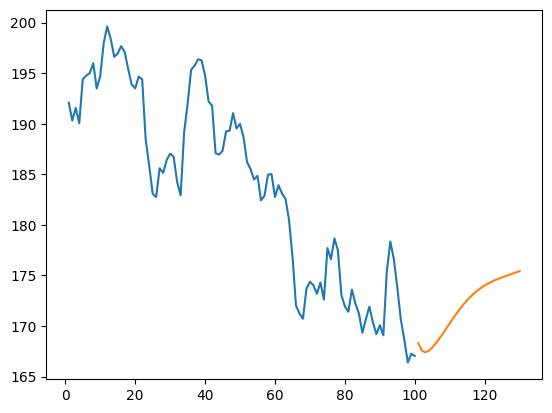

In [205]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

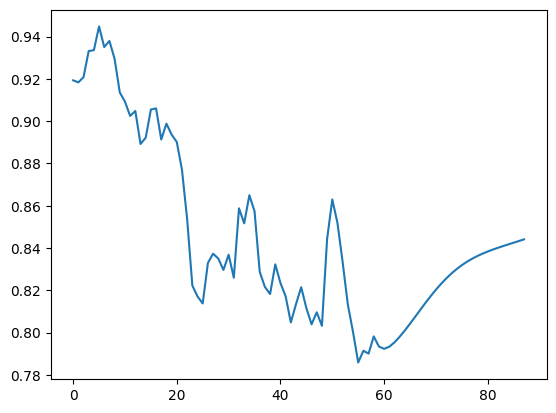

In [206]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [207]:
df3=scaler.inverse_transform(df3).tolist()

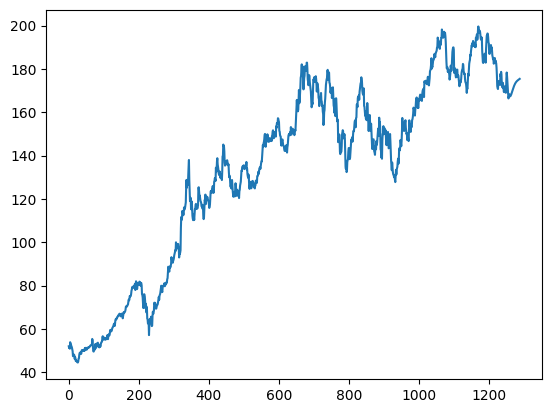

In [208]:
plt.plot(df3)